#### [Data set here :](https://drive.google.com/file/d/1Xo4c_suBwjw0rQTYO6juYgZP00440TSt/view?usp=sharing)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('advertising.csv')
pd.options.display.max_columns= None
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

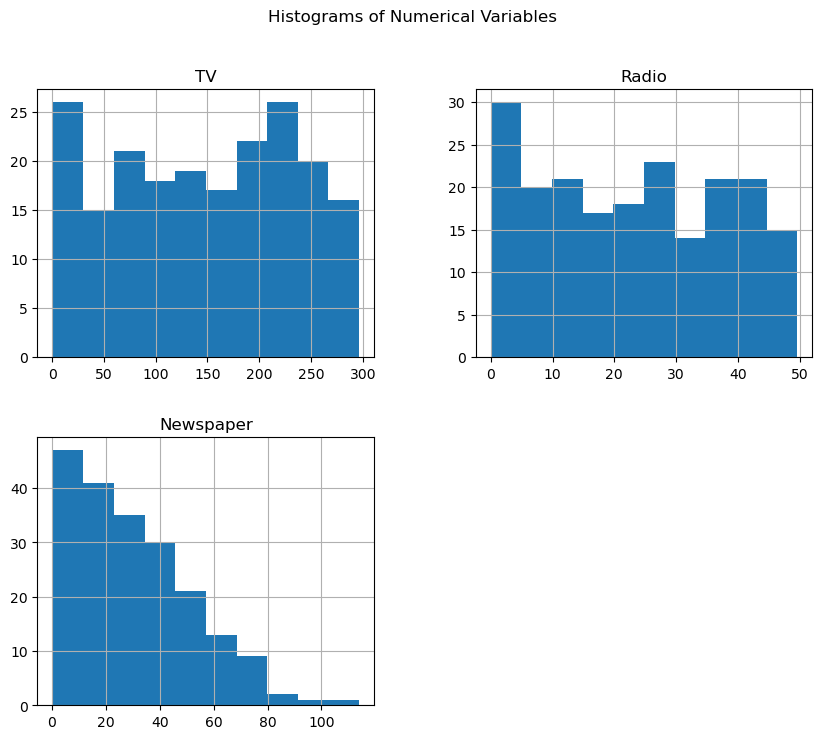

In [10]:
# histogram for numerical columns
numerical_cols = ['TV', 'Radio', 'Newspaper']
df[numerical_cols].hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

In [24]:
# split the data for train and test
X = df.drop(columns ='Sales')
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
degree = 2
poly_feat = PolynomialFeatures(degree= degree)
X_train_poly = poly_feat.fit_transform(X_train) 
X_test_poly = poly_feat.transform(X_test) 

In [26]:
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [27]:
y_train_pred= regressor.predict(X_train_poly)
y_test_pred= regressor.predict(X_test_poly)

In [31]:
print("Polynomial Regression Model Evaluation:")
print("------------------------------------------")
print("MAE for train:", mean_absolute_error(y_train_pred, y_train))
print("MAE for test:", mean_absolute_error(y_test_pred, y_test))

print("------------------------------------------")
print("MSE for train:", mean_squared_error(y_train_pred, y_train))
print("MSE for test:", mean_squared_error(y_test_pred, y_test))
print("------------------------------------------")
print("r2 score for train:", r2_score(y_train_pred, y_train))
print("r2 score for tset:", r2_score(y_test_pred, y_test))

Polynomial Regression Model Evaluation:
------------------------------------------
MAE for train: 1.0565622765314981
MAE for test: 0.9033713382793216
------------------------------------------
MSE for train: 1.9077576664191813
MSE for test: 1.4425426369020617
------------------------------------------
r2 score for train: 0.9233574230717743
r2 score for tset: 0.9541346220419015


In [33]:
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_poly, y_train)


y_pred_ridge = ridge_model.predict(X_test_poly)


ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("------------------------------------------")
print("Mean Squared Error:", ridge_mse)
print("R-squared Score:", ridge_r2)

Ridge Regression Results:
------------------------------------------
Mean Squared Error: 1.4425528162458727
R-squared Score: 0.9533171046905815


In [34]:
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train_poly, y_train)


y_pred_lasso = lasso_model.predict(X_test_poly)


lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Results:")
print("------------------------------------------")
print("Mean Squared Error:", lasso_mse)
print("R-squared Score:", lasso_r2)


Lasso Regression Results:
------------------------------------------
Mean Squared Error: 1.4946179312101784
R-squared Score: 0.951632209493831
